# Random Forest MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

## Data

In [2]:

full_train = pd.read_csv("../../../data/csev/model_4/trainCSEV.csv")
full_test = pd.read_csv("../../../data/csev/model_4/testCSEV.csv")

In [3]:
Y_train = full_train['C_SEV']
X_train = full_train.drop(['C_SEV'], axis=1)
Y_train.value_counts()

1    27796
0    27794
Name: C_SEV, dtype: int64

In [4]:
Y_test = full_test['C_SEV']
X_test = full_test.drop(['C_SEV'], axis=1)
Y_test.value_counts()

1    351139
0      6949
Name: C_SEV, dtype: int64

##  Random Forest Classifier

In [5]:
model = RandomForestClassifier()

In [6]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [7]:
Y_pred = model.predict(X_test)

## Evaluation

In [8]:
metrics.accuracy_score(Y_test, Y_pred)

0.6785594602444092

Matriz de confusión
[[  4534   2415]
 [112689 238450]]
Matriz de confusión normalizada
[[0.65246798 0.34753202]
 [0.32092419 0.67907581]]


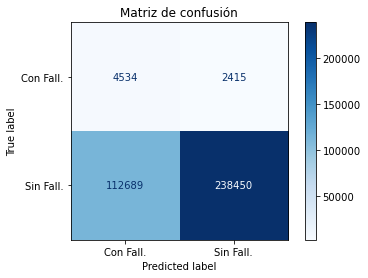

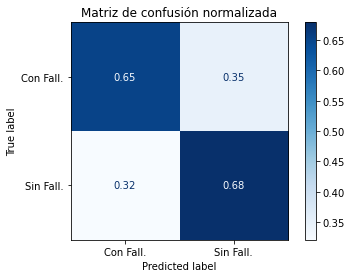

In [9]:
titles_options = [
    ("Matriz de confusión", None),
    ("Matriz de confusión normalizada", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        Y_test,
        display_labels=['Con Fall.', 'Sin Fall.'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [10]:
print("Classification Report")
print(classification_report(Y_test, Y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.04      0.65      0.07      6949
           1       0.99      0.68      0.81    351139

    accuracy                           0.68    358088
   macro avg       0.51      0.67      0.44    358088
weighted avg       0.97      0.68      0.79    358088

